In [85]:
"""
referensi

https://towardsdatascience.com/ai-cluster-analysis-of-categorical-data-part-i-8e702ca6675b
https://towardsdatascience.com/ai-cluster-analysis-of-categorical-data-part-ii-47f3a13601a2
https://www.kaggle.com/kerneler/starter-clash-royale-top-battles-91c02b8d-6
https://www.kaggle.com/freakyoiseau/analyzing-card-performance-with-regression
"""

'\nreferensi\n\nhttps://towardsdatascience.com/ai-cluster-analysis-of-categorical-data-part-i-8e702ca6675b\nhttps://towardsdatascience.com/ai-cluster-analysis-of-categorical-data-part-ii-47f3a13601a2\nhttps://www.kaggle.com/kerneler/starter-clash-royale-top-battles-91c02b8d-6\nhttps://www.kaggle.com/freakyoiseau/analyzing-card-performance-with-regression\n'

In [86]:
# Import library yang dibutuhkan
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates

In [87]:
# datasaet kartu
df = pd.read_csv("kartu.csv")
# df = df.head(30) # tes sebagian dulu
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,ElixirGolem,HealSpirit,eDragon,Exe,NightWitch,Rage,BattleHealer,Tornado
1,1,Sparky,RamRider,eBarbs,Musk,Prince,Tesla,Arrows,Fireball
2,2,DarkPrince,IceWiz,GoblinCage,InfernoD,Tornado,Lightning,ElectroGiant,Bomber
3,3,Witch,DarkPrince,Poison,Log,RoyalRecruits,Prince,FlyingMachine,Snowball
4,4,Bandit,Horde,Sparky,Archers,Skellies,Zap,Princess,Giant


In [88]:
#https://docs.google.com/spreadsheets/d/1wIH69gfuCCoPRoWOIyUqQHMKkUfpb4GAxUbBYX8PwRc/edit#gid=1477229539
C = pd.read_csv('CRL_Cards_Classification2.csv')
cards_classifier = C.copy() 
cards_classifier.pop('Type_1')
cards_classifier = cards_classifier.values.transpose()
cards_classifier

array([['Arrows', 'Minions', 'Archers', 'Knight', 'Fireball', 'MP',
        'Musk', 'Giant', 'WallBreakers', 'Prince', 'BabyD', 'Skarmy',
        'SpearGobs', 'Gobs', 'GobHut', 'Hog', 'Barrel', 'Hunter',
        'Bomber', 'Skellies', 'Tombstone', 'Valk', 'GiantSkelly',
        'Witch', 'Cannon', 'Barbs', 'BarbHut', 'Ram', 'BarbBarrel',
        'Golem', 'Zap', 'Horde', 'Inferno', 'MM', 'Lightning', 'PEKKA',
        'Miner', 'Lava', 'Bats', 'FireSpirit', 'Furnace', 'Wiz',
        'Tornado', 'Poison', 'MagicArcher', 'NightWitch', 'Mortar',
        'SkellyBarrel', 'Rocket', 'FlyingMachine', 'XBow', 'Balloon',
        'Log', 'InfernoD', 'RoyalRecruits', 'RG', 'RoyalHogs', '3M',
        'DarkPrince', 'Guards', 'MegaKnight', 'Princess', 'Snowball',
        'IceSpirit', 'Pump', 'IceGolem', 'Freeze', 'Bowler', 'Lumber',
        'IceWiz', 'Rascals', 'GobGang', 'Earthquake', 'DartGob',
        'GobGiant', 'Bandit', 'Firecracker', 'eBarbs', 'HealSpirit',
        'BombTower', 'Rage', 'CannonCart', 

## Labeling the Entire Dataset

In [89]:
#flat everything in one list
one_row = list()

for k in df.drop(columns="Unnamed: 0", axis=1).values:
    for n in k:
        one_row.append(n)

one_row = pd.DataFrame(one_row)
one_row

,0
0,ElixirGolem
1,HealSpirit
2,eDragon
3,Exe
4,NightWitch
...,...
1022459,Hog
1022460,Golem
1022461,NightWitch
1022462,MP


In [90]:
one_row[0].value_counts()

Valk        42708
Zap         38451
Wiz         33530
Fireball    33007
Arrows      32677
            ...  
Rascals      1252
XBow         1245
3M           1131
GobGiant     1123
BarbHut       672
Name: 0, Length: 103, dtype: int64

<AxesSubplot:title={'center':'Kartu paling sering digunakan'}, ylabel='Nama kartu'>

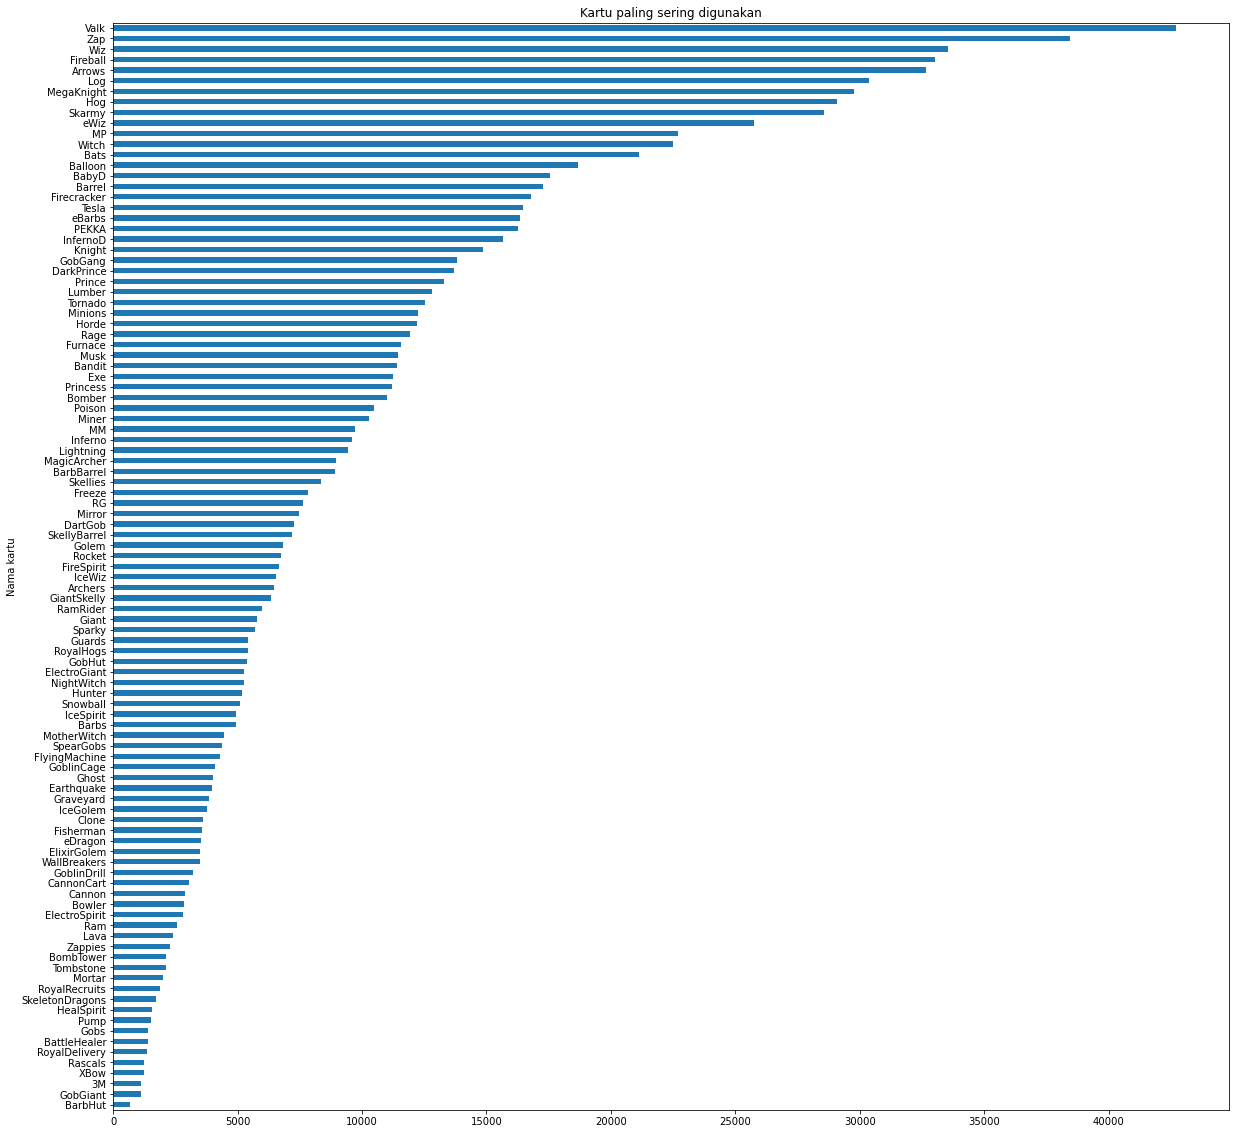

In [91]:
one_row[0].value_counts().sort_values(ascending=True).plot(kind='barh', title='Kartu paling sering digunakan',
        xlabel='Nama kartu', figsize=(20, 20))

In [92]:
#labeled list
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(one_row[0])
one_row_labeled = le.transform(one_row[0])
one_row_labeled


array([ 23,  44, 101, ...,  68,  59,   2])

In [93]:
#rebuild the original dataset and convert it to DataFrame
X_labeled = np.array_split(one_row_labeled, (len(one_row)/8))
X_labeled = pd.DataFrame(X_labeled)
X_labeled

,0,1,2,3,4,5,6,7
0,23,44,101,24,68,75,11,92
1,88,77,100,67,71,90,2,26
2,18,50,38,52,92,55,21,13
3,95,18,70,56,82,71,29,87
4,5,46,88,1,85,98,72,33
...,...,...,...,...,...,...,...,...
127803,95,5,61,45,93,98,83,60
127804,19,67,70,93,3,56,59,9
127805,95,46,81,4,0,70,41,100
127806,58,50,45,98,83,48,51,26


In [94]:
print(max(one_row_labeled+1), len(X_labeled))

103 127808


Our dataset has a total of 103 cards used among players in any possible deck. This means that for every row there have to be 103 columns, each one representing a dummy variable.

In [95]:
m = np.zeros(shape=(len(X_labeled), max(one_row_labeled)+1))

print(m.shape)

for row in range(len(X_labeled)):
  for col in X_labeled.columns:
    m[row][X_labeled.loc[row, col]] = 1

m = pd.DataFrame(m)
m

(127808, 103)


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127803,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
127804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127805,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Modelling

In [96]:
#convert one_hot numbers to final decks
def archetypes(knode_list):
  archetypes_list = list()

  #for each 1 inside the one_hot cluster form return its number
  #not all clusters have the same lenght
  #store all number is arrays
  cc = list()
  for n_centroids in range(len(km.cluster_centroids_)):
    for k in range(len(km.cluster_centroids_[n_centroids])):
      if km.cluster_centroids_[n_centroids][k] == 1:
        cc.append(k)
  len(cc)

  #determines number of chunks per cluster
  n_chunks = list()
  for am in range(len(km.cluster_centroids_)):
    n_chunks.append((list(km.cluster_centroids_[am]).count(1)))
  n_chunks

  #creates the meta-decks
  from itertools import islice
  it = iter(cc)
  sliced =[list(islice(it, 0, i)) for i in n_chunks]
  sliced

  sliced_list = list()
  #convertion numbers to card names
  for o in sliced:
    sliced_list.append(list(le.inverse_transform(o)))
  
  #archetipi come si deve ma ancora disorganizzati come sorting
  #for _ in sliced_list:
  #  print(_)

  #we only conserv the win conditions
  card_dictionary = dict(zip(cards_classifier[0], cards_classifier[1]))
  card_dictionary

  #an absurd way of making a copy of our dataset, .copy() does not work
  list_tot_classification = [x[:] for x in sliced_list] 

  for o1 in range(len(list_tot_classification)):
    for o2 in range(len(list_tot_classification[o1])):
      a = card_dictionary.get(list_tot_classification[o1][o2])
      list_tot_classification[o1][o2] = a

  only_win_conditions = list()
  #only conserve lists with win conditions
  for o3 in range(len(list_tot_classification)):
    print(list_tot_classification[o3])
    if 'Win Condition' in list_tot_classification[o3]:

      only_win_conditions.append(sliced_list[o3])

  #we store all the lists with a lenght of 8: full decks
  for _ in sorted(only_win_conditions):
    if len(_) == 8:
      archetypes_list.append(_)
    
  return archetypes_list

In [97]:
# #questo funziona
# from kmodes.kmodes import KModes
# n_clusters = 25
# km = KModes(n_clusters=n_clusters, init='Cao', n_init=100, verbose=0)
# clusters = km.fit_predict(m)

# #one_hot results to archetypes sorted by win condition
# archetypes_list = archetypes(km.cluster_centroids_)
# for _ in archetypes_list:
#   print(_)

# m["target"] = clusters


In [98]:
# m.head()

In [99]:
# m.to_csv("cluster_output.csv")

In [100]:

# fin = []
# for i in km.cluster_centroids_:
#     arr = []
#     thisI = i.tolist()

#     for it in range(len(i)):
#         if i[it] == 1:
#             arr.append(it)

#     fin.append(le.inverse_transform(arr))

#     # print()

# print()
# fin.sort(key = len, reverse=True)
# print(fin)

# for i in fin:
#     print(i)
# # strings.sort(key = len)
    


```
>> Output
[]
['Arrows']
['Barrel']
['BabyD' 'Tornado']
['Poison']
['Bomber']
['Golem' 'NightWitch']
['Clone' 'GiantSkelly' 'SkellyBarrel']
['Arrows' 'Valk']
['PEKKA' 'Zap']
['Skarmy' 'Zap']
['Bats' 'MegaKnight']
['Barrel' 'Valk']
['MM' 'Zap']
['Arrows' 'Fireball']
['Fireball' 'Horde' 'Skarmy' 'Wiz']
['PEKKA' 'Tornado' 'eWiz']
['Log' 'Skarmy']
['BabyD' 'MegaKnight' 'Witch']
['DarkPrince' 'Fireball' 'eWiz']
['Hog' 'Log' 'Tesla']
['DarkPrince' 'Log']
['Firecracker' 'Tesla' 'Zap']
['Balloon' 'InfernoD' 'Valk']
['Zap' 'eBarbs']
```

# 2 prediksi

Salah satu permasalahan besar clash royale ada pada deck building. Banyak pemain tahu beberapa kartu yang ingin mereka pakai, tetapi tidak tahu kartu mana yang paling baik untuk melengkapi deck mereka. Pada bagian ini akan diberikan rekomendasi kartu yang perlu ditambahkan berdasarkan inputan dari pemain.

Berdasarkan clustering yang telah dilakukan di awal, telah didapatkan jumlah cluster yang cukup optimal, yaitu sebanyak 25 cluster. Untuk memberikan rekomendasi kartu pelengkap pada pemain berdasarkan kartu yang diinputnya, bisa digunakan berbagai model klasifikasi. Akan dicoba berbagai model tersebut untuk dilihat berbagai metricnya.

In [101]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
    

def evaluate_classifier_performance(y_pred, y_test, classifier):
    # Informasi evaluasi secara compact
    
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, y_pred)))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Macro Average:', precision_score(y_test, y_pred, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, y_pred, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, y_pred, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, y_pred, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, y_pred, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, y_pred, average='micro'))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=classifier.classes_).plot()

In [102]:
m = pd.read_csv("cluster_output.csv")


In [103]:
m.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '94', '95', '96', '97', '98', '99', '100', '101', '102', 'target'],
      dtype='object', length=105)

In [104]:
from sklearn.model_selection import train_test_split

X = m.drop(columns=["target"], axis=1)
y = m["target"]

# Membentuk 4 variabel X_train, X_test, y_train, dan y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=2021)

## Modelling

#### KNeighborsClassifier
Berikut adalah hasil evaluasi klasifikasi dataset apabila menggunakan KNeighborsClassifier

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      8043
           1       0.77      0.77      0.77      4617
           2       0.72      0.63      0.67      1842
           3       0.75      0.86      0.80      1075
           4       0.82      0.70      0.76      2429
           5       0.77      0.53      0.63      1680
           6       0.80      0.91      0.85       913
           7       0.79      0.68      0.73       455
           8       0.73      0.95      0.83      4670
           9       0.79      0.89      0.83      2574
          10       0.73      0.89      0.80      2500
          11       0.76      0.87      0.81      2381
          12       0.77      0.75      0.76      1657
          13       0.78      0.65      0.71       867
          14       0.82      0.55      0.66      1037
          15       0.66      0.81      0.73      1562
          16       0.78      0.62      0.69      1119
          17       0.77      0.59      0.67      1220
          18       0.71      0.64      0.67      1783
          19       0.72      0.63      0.67      1538
          20       0.70      0.79      0.74      2564
          21       0.87      0.48      0.62       757
          22       0.75      0.41      0.53       910
          23       0.73      0.58      0.65      1661
          24       0.80      0.63      0.70      1270

    accuracy                           0.74     51124
   macro avg       0.76      0.70      0.72     51124
weighted avg       0.75      0.74      0.74     51124


Accuracy: 0.7418629215241374
Precision Macro Average: 0.7592927281487873
Precision Micro Average: 0.7418629215241374
Recall Macro Average: 0.7010160779747321
Recall Micro Average: 0.7418629215241374
F1 Macro Average: 0.7195710476890836
F1 Micro Average: 0.7418629215241375

#### Naive Bayes
Berikut adalah hasil evaluasi klasifikasi dataset apabila menggunakan Naive Bayes

In [105]:
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      8043
           1       0.79      0.79      0.79      4617
           2       0.71      0.67      0.69      1842
           3       0.52      0.69      0.59      1075
           4       0.80      0.74      0.77      2429
           5       0.91      0.65      0.76      1680
           6       0.67      0.90      0.77       913
           7       0.66      0.85      0.74       455
           8       0.75      0.89      0.82      4670
           9       0.71      0.86      0.78      2574
          10       0.69      0.78      0.73      2500
          11       0.65      0.72      0.68      2381
          12       0.79      0.77      0.78      1657
          13       0.61      0.67      0.64       867
          14       0.87      0.53      0.66      1037
          15       0.49      0.77      0.60      1562
          16       0.71      0.57      0.64      1119
          

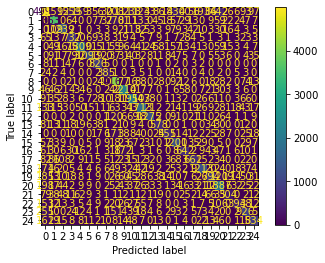

In [106]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(bayes_pred, y_test, bayes)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      8043
           1       0.79      0.79      0.79      4617
           2       0.71      0.67      0.69      1842
           3       0.52      0.69      0.59      1075
           4       0.80      0.75      0.77      2429
           5       0.91      0.65      0.76      1680
           6       0.67      0.90      0.77       913
           7       0.66      0.85      0.74       455
           8       0.76      0.89      0.82      4670
           9       0.71      0.86      0.78      2574
          10       0.69      0.78      0.73      2500
          11       0.64      0.72      0.68      2381
          12       0.79      0.77      0.78      1657
          13       0.61      0.67      0.64       867
          14       0.87      0.53      0.66      1037
          15       0.49      0.77      0.60      1562
          16       0.71      0.57      0.63      1119
          17       0.70      0.54      0.61      1220
          18       0.70      0.68      0.69      1783
          19       0.67      0.51      0.58      1538
          20       0.60      0.74      0.66      2564
          21       0.70      0.40      0.51       757
          22       0.76      0.43      0.55       910
          23       0.59      0.55      0.57      1661
          24       0.74      0.66      0.70      1270

    accuracy                           0.70     51124
   macro avg       0.70      0.68      0.68     51124
weighted avg       0.71      0.70      0.70     51124


Accuracy: 0.7045614584148345
Precision Macro Average: 0.7015510877797588
Precision Micro Average: 0.7045614584148345
Recall Macro Average: 0.6799209596471303
Recall Micro Average: 0.7045614584148345
F1 Macro Average: 0.6794731385450891
F1 Micro Average: 0.7045614584148345

#### Decision Tree (Gini & Entropy)
Berikut adalah hasil evaluasi klasifikasi dataset apabila menggunakan Decision Tree. Kali ini menggunakan variasi Gini & Entropy untuk Decision Tree.

In [107]:
len(m["target"].unique())

25

In [108]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
y_pred_dt_gini = classifier_dt_gini.predict(X_test)

classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
y_pred_dt_entropy = classifier_dt_entropy.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.91      0.53      0.67     13865
           1       1.00      0.98      0.99      4718
           2       1.00      0.92      0.96      1997
           3       0.84      0.44      0.57      2053
           4       0.99      0.96      0.98      2492
           5       1.00      0.89      0.94      1880
           6       0.61      0.94      0.74       595
           7       0.03      0.62      0.05        21
           8       1.00      0.99      1.00      4699
           9       1.00      0.98      0.99      2608
          10       1.00      0.97      0.98      2575
          11       0.86      0.97      0.91      2111
          12       0.99      0.98      0.98      1687
          13       0.26      0.98      0.42       234
          14       1.00      0.98      0.99      1052
          15       0.65      0.67      0.66      1515
          16       0.75      0.95      0.84       878
          

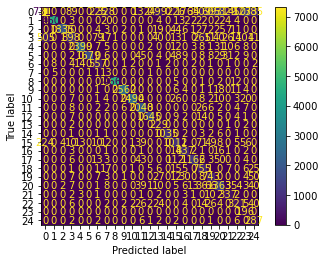

In [109]:
# Evaluasi Varian Gini
evaluate_classifier_performance(y_test, y_pred_dt_gini, classifier_dt_gini)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.91      0.53      0.67     13865
           1       1.00      0.98      0.99      4718
           2       1.00      0.92      0.96      1996
           3       0.84      0.44      0.58      2054
           4       0.99      0.96      0.98      2499
           5       1.00      0.89      0.94      1880
           6       0.61      0.95      0.74       586
           7       0.03      0.54      0.05        24
           8       1.00      0.99      1.00      4699
           9       0.99      0.98      0.99      2604
          10       1.00      0.97      0.98      2576
          11       0.86      0.97      0.91      2111
          12       0.99      0.98      0.98      1685
          13       0.26      0.98      0.41       232
          14       1.00      0.98      0.99      1050
          15       0.65      0.67      0.66      1517
          16       0.75      0.95      0.84       878
          17       0.95      0.83      0.89      1403
          18       0.42      0.89      0.57       848
          19       0.48      0.83      0.61       898
          20       0.53      0.82      0.65      1657
          21       0.45      0.93      0.60       361
          22       0.35      0.67      0.46       478
          23       0.12      1.00      0.21       196
          24       0.23      0.93      0.36       309

    accuracy                           0.80     51124
   macro avg       0.70      0.86      0.72     51124
weighted avg       0.89      0.80      0.82     51124


Accuracy: 0.8018934355684219
Precision Macro Average: 0.6959917588901959
Precision Micro Average: 0.8018934355684219
Recall Macro Average: 0.8635603807640406
Recall Micro Average: 0.8018934355684219
F1 Macro Average: 0.7209021228984546
F1 Micro Average: 0.8018934355684219

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.92      0.58      0.71     12620
           1       1.00      0.98      0.99      4715
           2       1.00      0.96      0.98      1916
           3       0.82      0.95      0.88       925
           4       0.97      0.96      0.96      2438
           5       1.00      0.91      0.95      1850
           6       0.61      0.97      0.75       575
           7       0.03      0.46      0.05        26
           8       1.00      0.99      1.00      4696
           9       0.99      1.00      1.00      2572
          10       1.00      0.98      0.99      2558
          11       0.89      0.96      0.93      2203
          12       0.99      0.99      0.99      1670
          13       0.99      0.94      0.96       913
          14       0.99      0.98      0.99      1045
          15       0.26      0.95      0.40       424
          16       0.38      0.49      0.43       863
          

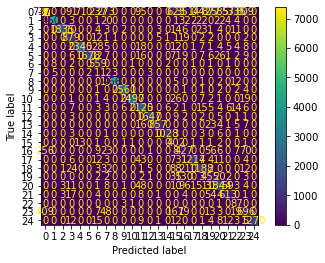

In [110]:
# Evaluasi Varian Entropy
evaluate_classifier_performance(y_test, y_pred_dt_entropy, classifier_dt_entropy)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.92      0.58      0.71     12620
           1       1.00      0.98      0.99      4715
           2       0.99      0.96      0.98      1913
           3       0.82      0.95      0.88       930
           4       0.96      0.96      0.96      2435
           5       1.00      0.91      0.95      1850
           6       0.61      0.96      0.75       581
           7       0.03      0.65      0.05        20
           8       1.00      0.99      1.00      4699
           9       1.00      1.00      1.00      2575
          10       1.00      0.98      0.99      2552
          11       0.89      0.96      0.93      2205
          12       0.99      0.99      0.99      1671
          13       0.99      0.94      0.96       910
          14       0.99      0.98      0.98      1039
          15       0.26      0.95      0.40       423
          16       0.38      0.49      0.43       863
          17       1.00      0.88      0.93      1379
          18       0.67      0.86      0.75      1379
          19       0.30      0.69      0.41       659
          20       0.72      0.85      0.78      2171
          21       0.81      0.86      0.83       712
          22       0.10      0.98      0.17        89
          23       0.42      0.50      0.46      1382
          24       1.00      0.94      0.97      1352

    accuracy                           0.84     51124
   macro avg       0.75      0.87      0.77     51124
weighted avg       0.90      0.84      0.85     51124


Accuracy: 0.8382168844378374
Precision Macro Average: 0.7527752930793487
Precision Micro Average: 0.8382168844378374
Recall Macro Average: 0.8714314286644219
Recall Micro Average: 0.8382168844378374
F1 Macro Average: 0.7703828210021613
F1 Micro Average: 0.8382168844378374

Dapat dilihat secara overall, model terbaik yang dapat digunakan adalah decision tree. Dengan demikian, rekomendasi mengenai kartu yang perlu ditambahkan agar menjadi meta-deck sudah dapat dibuat. Karena aplikasi ini memiliki tujuan untuk rekomendasi, alternatif lain yang bisa dilakukan adalah dapat diberikan beberapa prediksi sekaligus. Seperti pada KNN, bisa ditambahkan sekitar 10 data terdekatnya dan diberikan rekomendasi pada pemain. Bisa juga apabila menggunakan Naive Bayes memilih beberapa cluster dengan peluang tertinggi untuk direkomendasikan pada pemain. Namun, pada kasus ini kami hanya merekomendasikan 1 deck saja yang paling meta pada pemain sesuai inputannya.     

Namun, hasil ini belum tentu dapat diandalkan. Kembali lagi pada masalah awal, yaitu clustering, data mentah pada awal memang sudah dilabeli dengan clusternya yang sesuai. Akan tetapi, karena yang akan dibuat adalah rekomendasi meta-deck dari suatu input dari pemain

# Extra

In [111]:
def to_one_hot_encoding(a):
    a = le.transform(a)

    print(a)

    m = np.zeros(max(one_row_labeled)+1)
    
    for it in a:
        m[it] = 1

    return m

In [112]:
def to_card(a):
    arr = []
    
    for it in range(len(a[0])):
        if a[0][it] == 1:
            arr.append(it)

    print(arr)


    return le.inverse_transform(arr)
        

In [114]:

# KNN
a = ['BattleHealer', 'ElixirGolem', 'Exe', 'HealSpirit', 'NightWitch', 'Rage', 'Tornado', 'eDragon']

c = classifier_dt_entropy.predict(np.reshape(to_one_hot_encoding(a), (1,-1)))

to_card(km.cluster_centroids_[c])

[ 11  23  24  44  68  75  92 101]


ValueError: X has 103 features, but DecisionTreeClassifier is expecting 104 features as input.

In [113]:
# Decision Tree Entropy
a = ['Fireball', 'Inferno', 'Poison', 'Zap']

c = classifier_dt_entropy.predict(np.reshape(to_one_hot_encoding(a), (1,-1)))

to_card(km.cluster_centroids_[c])




[26 51 70 98]


ValueError: X has 103 features, but DecisionTreeClassifier is expecting 104 features as input.

In [ ]:
# KNN
a = ['BattleHealer', 'ElixirGolem', 'Exe', 'HealSpirit', 'NightWitch', 'Rage', 'Tornado', 'eDragon']

c = knn.predict(np.reshape(to_one_hot_encoding(a), (1,-1)))

to_card(km.cluster_centroids_[c])



In [ ]:
# Naive Bayes
a = ['Fireball', 'Inferno', 'Poison', 'Zap']

c = bayes.predict(np.reshape(to_one_hot_encoding(a), (1,-1)))

to_card(km.cluster_centroids_[c])



In [ ]:
x_input = to_one_hot_encoding(a)

In [ ]:
x_input

In [ ]:
m_copy = m.copy()
for i in range(len(x_input)):
  m_copy = m_copy[m_copy[str(i)] == 1]

print(m_copy)

In [ ]:
x_input = to_one_hot_encoding(a)

m_copy = m.copy()
for i in range(len(x_input)):
  if x_input[i] == 1:
    m_copy = m_copy[m_copy[str(i)] == 1]

print(m_copy)

In [ ]:
c = []
c.append(9)

In [ ]:
for ind, r in m_copy[m_copy["target"] == c[0]].drop(columns=["target"], axis=1).iterrows():
  arr = []
  for i in range(len(r)):
    if r[i] == 1:
      arr.append(i)

  print(to_card(arr))

# Cluster Analysis

Akan dilakukan identifikasi jumlah cluster yang paling optimal

Identifikasi jumlah cluster yang paling optimal dilakukan dengan menggunakan elbow method. Biasanya, pada garis yang mulanya menurun sedikit demi sedikit terdapat titik yang kemudian mendatar sangat ekstrem. Titik itulah yang biasanya digunakan sebagai pemilihan jumlah cluster. Namun, pada grafik di atas kurang terlihat dengan jelas titik tersebut, sehingga dilakukan perkiraan di sekitar 20. Karena data yang kami gunakan bersifat categorical dan akan menggunakan K-Mode, sangat sulit untuk menentukan jumlah cluster terbaik. Selanjutnya kami akan mencoba beberapa jumlah cluster lainnya dan membandingkan hasilnya.

20 list berikut merupakan one_hot numbers yang mendeskripsikan fitur untuk setiap single cluster. Setiap baris terdiri dari x elements, beberapa kolom bernilai 1, dan mayoritas bernilai 0. Untuk setiap single list, x binary values tersebut akan dikonversikan ke numbers, kemudian diubah menjadi nama card-nya untuk mendapatkan 20 meta-decks.

Akan dilakukan translasi dari output model K-Mode menjadi string original nya

# Tuning Jumlah Cluster

Dapat dilihat, semakin tinggi jumlah cluster, semakin banyak meta-decks yang serupa. 

<b>n_clusters and n_meta_decks</b>

Selanjutnya, akan dibuat list yang berisi range dari clusters agar dapat dilihat hubungan antara jumlah cluster dan jumlah meta-deck

# Kesimpulan Mengenai Jumlah Cluster:
- Jika jumlah cluster terlalu kecil, akan didapati meta-decks yang sedikit juga. Meta-decks tersebut mungkin memang merupakan yang terbaik, tetapi hanya merepresentasikan sedikit meta-decks saja, padahal terdapat meta-decks yang lainnya juga.
- Apabila jumlah cluster terlalu besar, yang didapatkan bukan hanya list dari top meta-decks saja, tetapi juga variasi dari card utama pada list meta-deck tersebut.

## Estimasi top meta decks

Setelah dilakukan analisis lebih lanjut, jumlah cluster yang paling sesuai untuk menampilkan meta decks dengan variasi paling minimal adalah 25. Dapat disimpulkan bahwa berikut ini merupakan meta-decks pada saat dataset `kartu.csv` diambil.

# Alasan Penggunaan K-Mode

Sebelumnya, terdapat beberapa variasi algoritma clustering, dan yang dipelajari pada mata kuliah ini adalah Hierarchical clustering dan K-Means. K-Means memiliki kompleksitas waktu linier ataiu O(n) sedangkan Hierarchical clustering memiliki kompleksitas waktu kuadratik O(n^2) sehingga Hierarchical clustering kurang dapat meng-handle data yang cukup besar dengan baik. K-Mode merupakan adaptasi algoritma K-Means yang ditujukan untuk data categorical sehingga pada kasus ini digunakan K-Mode.